# 只用 numpy & pandas

In [2]:
# 第 0 步：匯入套件（只用 numpy & pandas）
import numpy as np
import pandas as pd

# 為了讓每次執行結果一致
np.random.seed(42)
# print(np.random.rand(3))

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Vibe Coding/Data/mnist_test.csv", header=None)

# print("Data shape:", df.shape)   # 例如 (10000, 785)
# df.head()


Data shape: (10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Vibe Coding/Data/mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Vibe Coding/Data/mnist_test.csv")


print("Train Data shape:", train_df.shape)   # 例如 (60001, 785)
print("Test Data shape:", test_df.shape)     # 例如 (10001, 785)


Train Data shape: (60000, 785)
Test Data shape: (10000, 785)


In [13]:
# # 把 DataFrame 變成 numpy 陣列
# data = df.values.astype(np.float32)

# # 第 0 欄是標籤（0~9）
# y = data[:, 0].astype(int)

# # 第 1~784 欄是像素
# X = data[:, 1:]

# # 像素從 0~255 正規化到 0~1
# X = X / 255.0

# print("X shape:", X.shape)   # (10000, 784)
# print("y shape:", y.shape)   # (10000,)

# # 切訓練 / 測試 (8:2)
# num_samples = X.shape[0]
# num_train = int(num_samples * 0.8)

# X_train, X_test = X[:num_train], X[num_train:]
# y_train, y_test = y[:num_train], y[num_train:]

# print("Train:", X_train.shape, y_train.shape)
# print("Test:", X_test.shape, y_test.shape)

In [14]:
# --- Training data ---
train_data = train_df.iloc[1:].values.astype(np.float32) # Skip the first row (header)
y_train = train_data[:, 0].astype(int)
X_train = train_data[:, 1:] / 255.0   # 正規化 (N, 784)

# --- Test data ---
test_data = test_df.iloc[1:].values.astype(np.float32) # Skip the first row (header)
y_test = test_data[:, 0].astype(int)
X_test = test_data[:, 1:] / 255.0     # 正規化 (M, 784)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (59999, 784)
y_train shape: (59999,)
X_test shape: (9999, 784)
y_test shape: (9999,)


In [15]:
# One-hot 編碼
num_classes = 10

def one_hot_encode(labels, num_classes):
    n = labels.shape[0]
    print(n)
    one_hot = np.zeros((n, num_classes), dtype=np.float32)
    print(one_hot)
    one_hot[np.arange(n), labels] = 1.0
    return one_hot

y_train_onehot = one_hot_encode(y_train, num_classes)
y_test_onehot = one_hot_encode(y_test, num_classes)

print("Example label & one-hot:", y_train[0], y_train_onehot[0])


59999
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
9999
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Example label & one-hot: 0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
# 第 3 步：定義簡單的兩層神經網路

class SimpleNN:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.1):
        # Xavier 初始化（使權重不會太大，讓訓練更穩定）
        self.W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)  # 輸入層 → 隱藏層 的權重
        self.b1 = np.zeros((1, hidden_dim))                                    # 隱藏層偏置
        self.W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim) # 隱藏層 → 輸出層 的權重
        self.b2 = np.zeros((1, output_dim))                                     # 輸出層偏置
        self.lr = learning_rate                                                 # 學習率

    # ReLU 啟動函數
    def relu(self, z):
        return np.maximum(0, z)  # 小於 0 的值變成 0，其餘保持不變

    # ReLU 導數（反向傳播用）
    def relu_grad(self, z):
        return (z > 0).astype(np.float32)  # z > 0 → 1，否則 0

    # Softmax：將輸出轉成機率分佈
    def softmax(self, z):
        # 為避免 exp 數值爆炸，先減掉每列的最大值
        z_shift = z - np.max(z, axis=1, keepdims=True)
        exp_scores = np.exp(z_shift)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # 機率 = exp / 全部 exp 之和
        return probs

    # 前向傳播
    def forward(self, X):
        # 第一層線性計算：XW1 + b1
        self.z1 = np.dot(X, self.W1) + self.b1               # (N, hidden_dim)
        self.a1 = self.relu(self.z1)                         # 套 ReLU → 隱藏層輸出 (N, hidden_dim)

        # 第二層線性計算：a1W2 + b2
        self.z2 = np.dot(self.a1, self.W2) + self.b2         # (N, output_dim)
        self.a2 = self.softmax(self.z2)                      # Softmax → 機率輸出

        return self.a2

    # 交叉熵損失
    def compute_loss(self, y_true_onehot, y_pred_prob):
        eps = 1e-10  # 避免 log(0) 的問題
        N = y_true_onehot.shape[0]
        log_probs = -np.log(y_pred_prob + eps)              # 對預測機率取 log
        loss = np.sum(y_true_onehot * log_probs) / N        # one-hot 只保留正確類別的 loss
        return loss

    # 反向傳播 + 更新參數
    def backward(self, X, y_true_onehot):
        N = X.shape[0]

        # Softmax + Cross Entropy 梯度簡化公式：
        # dL/dz2 = (預測 - 真實)/N
        delta2 = (self.a2 - y_true_onehot) / N              # (N, output_dim)

        # 計算 W2、b2 的梯度
        dW2 = np.dot(self.a1.T, delta2)                     # (hidden_dim, output_dim)
        db2 = np.sum(delta2, axis=0, keepdims=True)         # (1, output_dim)

        # 傳回到隱藏層
        delta1 = np.dot(delta2, self.W2.T) * self.relu_grad(self.z1)  # (N, hidden_dim)

        # 計算 W1、b1 的梯度
        dW1 = np.dot(X.T, delta1)                            # (input_dim, hidden_dim)
        db1 = np.sum(delta1, axis=0, keepdims=True)          # (1, hidden_dim)

        # 使用 SGD（梯度下降）更新參數
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    # 預測類別（回傳機率最大的索引）
    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

In [17]:
input_dim = X_train.shape[1]   # 輸入維度，例如 28*28 = 784
hidden_dim = 128               # 隱藏層神經元數
output_dim = 10                # 類別數（0~9）
learning_rate = 0.1
batch_size = 32
epochs = 10   # 先用少一點 epoch 比較快，熟悉流程後可再增加

# 建立模型
model = SimpleNN(input_dim, hidden_dim, output_dim, learning_rate)

num_train = X_train.shape[0]        # 訓練樣本總數
num_batches = num_train // batch_size  # 每個 epoch 的 batch 數（整除，多的會丟掉）

for epoch in range(1, epochs + 1):
    # 產生打亂用的索引，避免每次 epoch 都用同樣順序的資料
    indices = np.arange(num_train)
    np.random.shuffle(indices)

    # 依照打亂後的索引重新排列 X 與 y（保持對應關係）
    X_train_shuffled = X_train[indices]
    y_train_onehot_shuffled = y_train_onehot[indices]

    epoch_loss = 0.0  # 累積本 epoch 的 loss

    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size

        # 取出當前 mini-batch 的資料
        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_onehot_shuffled[start:end]

        # 前向傳播，得到預測機率
        y_pred = model.forward(X_batch)

        # 計算這個 batch 的 loss，並加入 epoch_loss
        loss = model.compute_loss(y_batch, y_pred)
        epoch_loss += loss

        # 反向傳播 + 參數更新
        model.backward(X_batch, y_batch)

    # 每個 epoch 結束後，用整個訓練資料來估計訓練準確率
    y_train_pred = model.predict(X_train)   # 預測類別（0~9）
    train_acc = np.mean(y_train_pred == y_train)  # 比對真實標籤，算平均 → 準確率

    # 輸出本 epoch 的平均 loss 與訓練準確率
    print(f"Epoch {epoch}/{epochs}, loss = {epoch_loss/num_batches:.4f}, train_acc = {train_acc:.4f}")


Epoch 1/10, loss = 0.3211, train_acc = 0.9470
Epoch 2/10, loss = 0.1505, train_acc = 0.9683
Epoch 3/10, loss = 0.1062, train_acc = 0.9755
Epoch 4/10, loss = 0.0829, train_acc = 0.9791
Epoch 5/10, loss = 0.0682, train_acc = 0.9846
Epoch 6/10, loss = 0.0575, train_acc = 0.9881
Epoch 7/10, loss = 0.0486, train_acc = 0.9900
Epoch 8/10, loss = 0.0425, train_acc = 0.9916
Epoch 9/10, loss = 0.0365, train_acc = 0.9925
Epoch 10/10, loss = 0.0322, train_acc = 0.9924


In [18]:
y_test_pred = model.predict(X_test)
test_acc = np.mean(y_test_pred == y_test)

print("Test accuracy:", test_acc)


Test accuracy: 0.9794979497949795


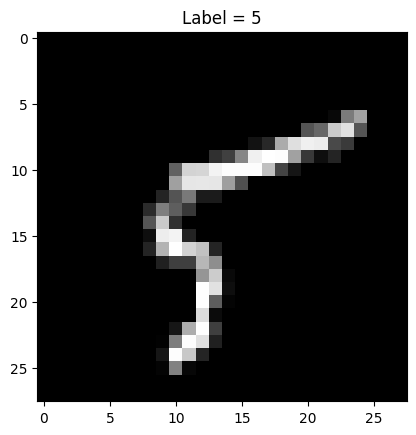

Predicted: 5


In [19]:
index = 58  # 想測試第幾張圖片

import matplotlib.pyplot as plt

# 顯示圖像
plt.imshow(X_test[index].reshape(28, 28), cmap="gray")
plt.title(f"Label = {y_test[index]}")
plt.show()

# 用 model 預測（需保留 batch 維度）
pred = model.predict(X_test[index:index+1])  # shape: (1, 784)
print("Predicted:", pred[0])


# 使用Keras

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Vibe Coding/Data/mnist_test.csv", header=None)

print("Data shape:", df.shape)   # 例如 (10000, 785)
df.head()

Data shape: (10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 第 0 欄是標籤
y = df.iloc[:, 0].values.astype("int")

# 後面 784 欄是像素
X = df.iloc[:, 1:].values.astype("float32") / 255.0

# 變 28*28 維度，只對 CNN 需要；ANN 不需要 reshape
print("X shape:", X.shape)   # (N, 784)
print("y shape:", y.shape)


X shape: (10000, 784)
y shape: (10000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = keras.Sequential([
    layers.Dense(256, activation="relu", input_shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7045 - loss: 1.0381 - val_accuracy: 0.9162 - val_loss: 0.2813
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9294 - loss: 0.2323 - val_accuracy: 0.9438 - val_loss: 0.1999
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9580 - loss: 0.1391 - val_accuracy: 0.9575 - val_loss: 0.1645
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9723 - loss: 0.0920 - val_accuracy: 0.9513 - val_loss: 0.1558
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9827 - loss: 0.0609 - val_accuracy: 0.9600 - val_loss: 0.1479
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9917 - loss: 0.0370 - val_accuracy: 0.9613 - val_loss: 0.1285
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9957 - loss: 0.0243 - val_accuracy: 0.9675 - val_loss: 0.1363
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9971 - loss: 0.0174 - val_accuracy: 

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test accuracy = {acc:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1837
Test accuracy = 0.9570


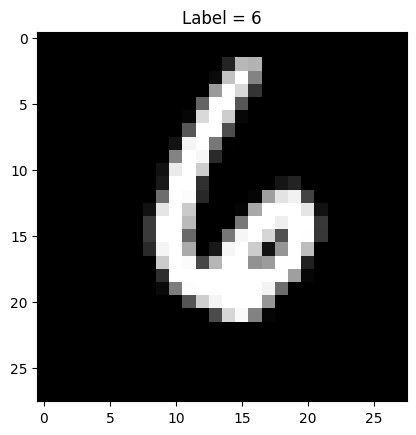

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Predicted: 6


In [ ]:
index = 0

import matplotlib.pyplot as plt
plt.imshow(X_test[index].reshape(28,28), cmap="gray")
plt.title(f"Label = {y_test[index]}")
plt.show()

pred = model.predict(X_test[index:index+1])
print("Predicted:", np.argmax(pred))
